In [32]:
import pandas as pd
import glob
base_path = './gen'
all_files = glob.glob(base_path + '/*.csv')

dataframes = []
for file_name in all_files:
    df = pd.read_csv(file_name)
    dataframes.append(df)

frame = pd.concat((dataframes))
frame['Timestamp'] = pd.to_datetime(frame['Timestamp'].astype(str), format='%Y-%m-%d %H:%M:%S')
frame = frame.set_index('Timestamp')
# frame.index
# frame.loc['2020-01']



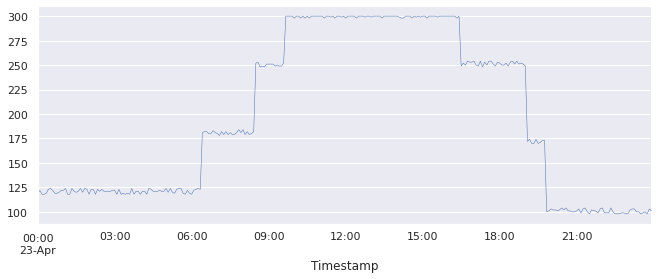

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})
frame.loc['2020-04-23']['Occupancy'].plot(linewidth=0.5)

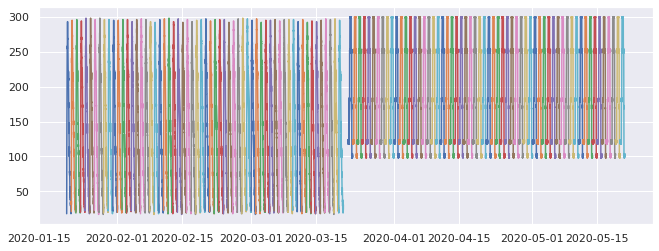

In [4]:
DFList = [group[1] for group in frame.groupby(frame.index.date)]
len(DFList)
sns.set(rc={'figure.figsize':(11, 4)})
fig = plt.figure()
for day in DFList:
    plt.plot(day.loc[:,'Occupancy'])

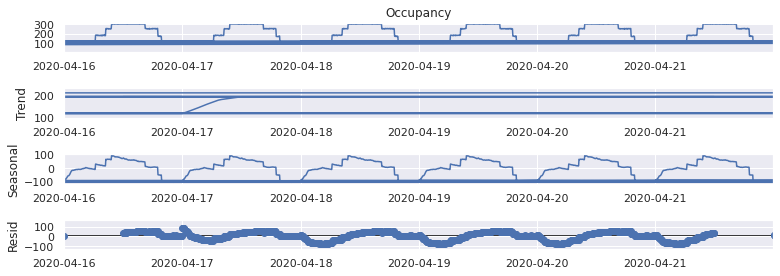

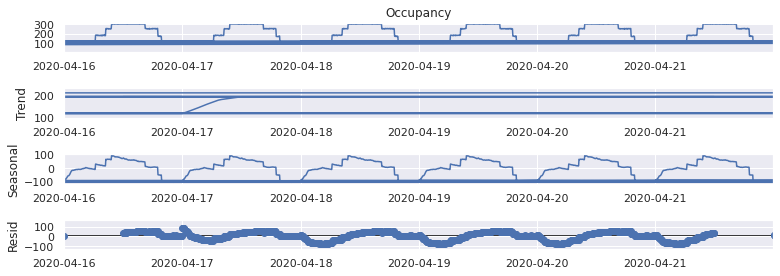

In [49]:
import statsmodels.api as sm
import numpy as np
# decomposition = sm.tsa.seasonal_decompose(frame.loc['2020-01':'2020-02'], model='additive')
# times = frame.set_index(frame.index.time)
# times.Occupancy.plot()
occupancy = frame.loc['2020-03':'2020-04','Occupancy']

decomposition = sm.tsa.seasonal_decompose(occupancy,freq=288)
decomposition.plot()

In [48]:
import datetime
# print(frame.head())
x = frame.resample('1H').mean().dropna()
x['Time'] = x.index.time
x=x.set_index('Time')
# print(x)
def predict(time):
    return np.average(x.loc[time,'Occupancy'])

predict(datetime.time(15,0))

187.49236111111114